In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
import math

In [2]:
match_txt = "x: ([-0-9\.]*) y: ([-0-9\.]*) z: ([-0-9\.]*)"

In [3]:
xs = []
ys = []
zs = []
mag = []
with open("game.txt", "r", encoding="utf8") as f:
    for line in f:
        stripped_line = line.strip()
        xyz = re.search(match_txt, stripped_line)
        try:
            x, y, z = xyz.group(1), xyz.group(2), xyz.group(3)
            #print("X = {}, Y = {}, Z = {}".format(x, y, z))
            xs.append(float(x))
            ys.append(float(y))
            zs.append(float(z))
        except:
            pass

In [4]:
mag = np.sqrt(np.square(xs)+np.square(ys)+np.square(zs))

In [5]:
ts = np.arange(0, len(xs), 1)
print(str(ts))

[    0     1     2 ... 29015 29016 29017]


<Figure size 432x288 with 0 Axes>

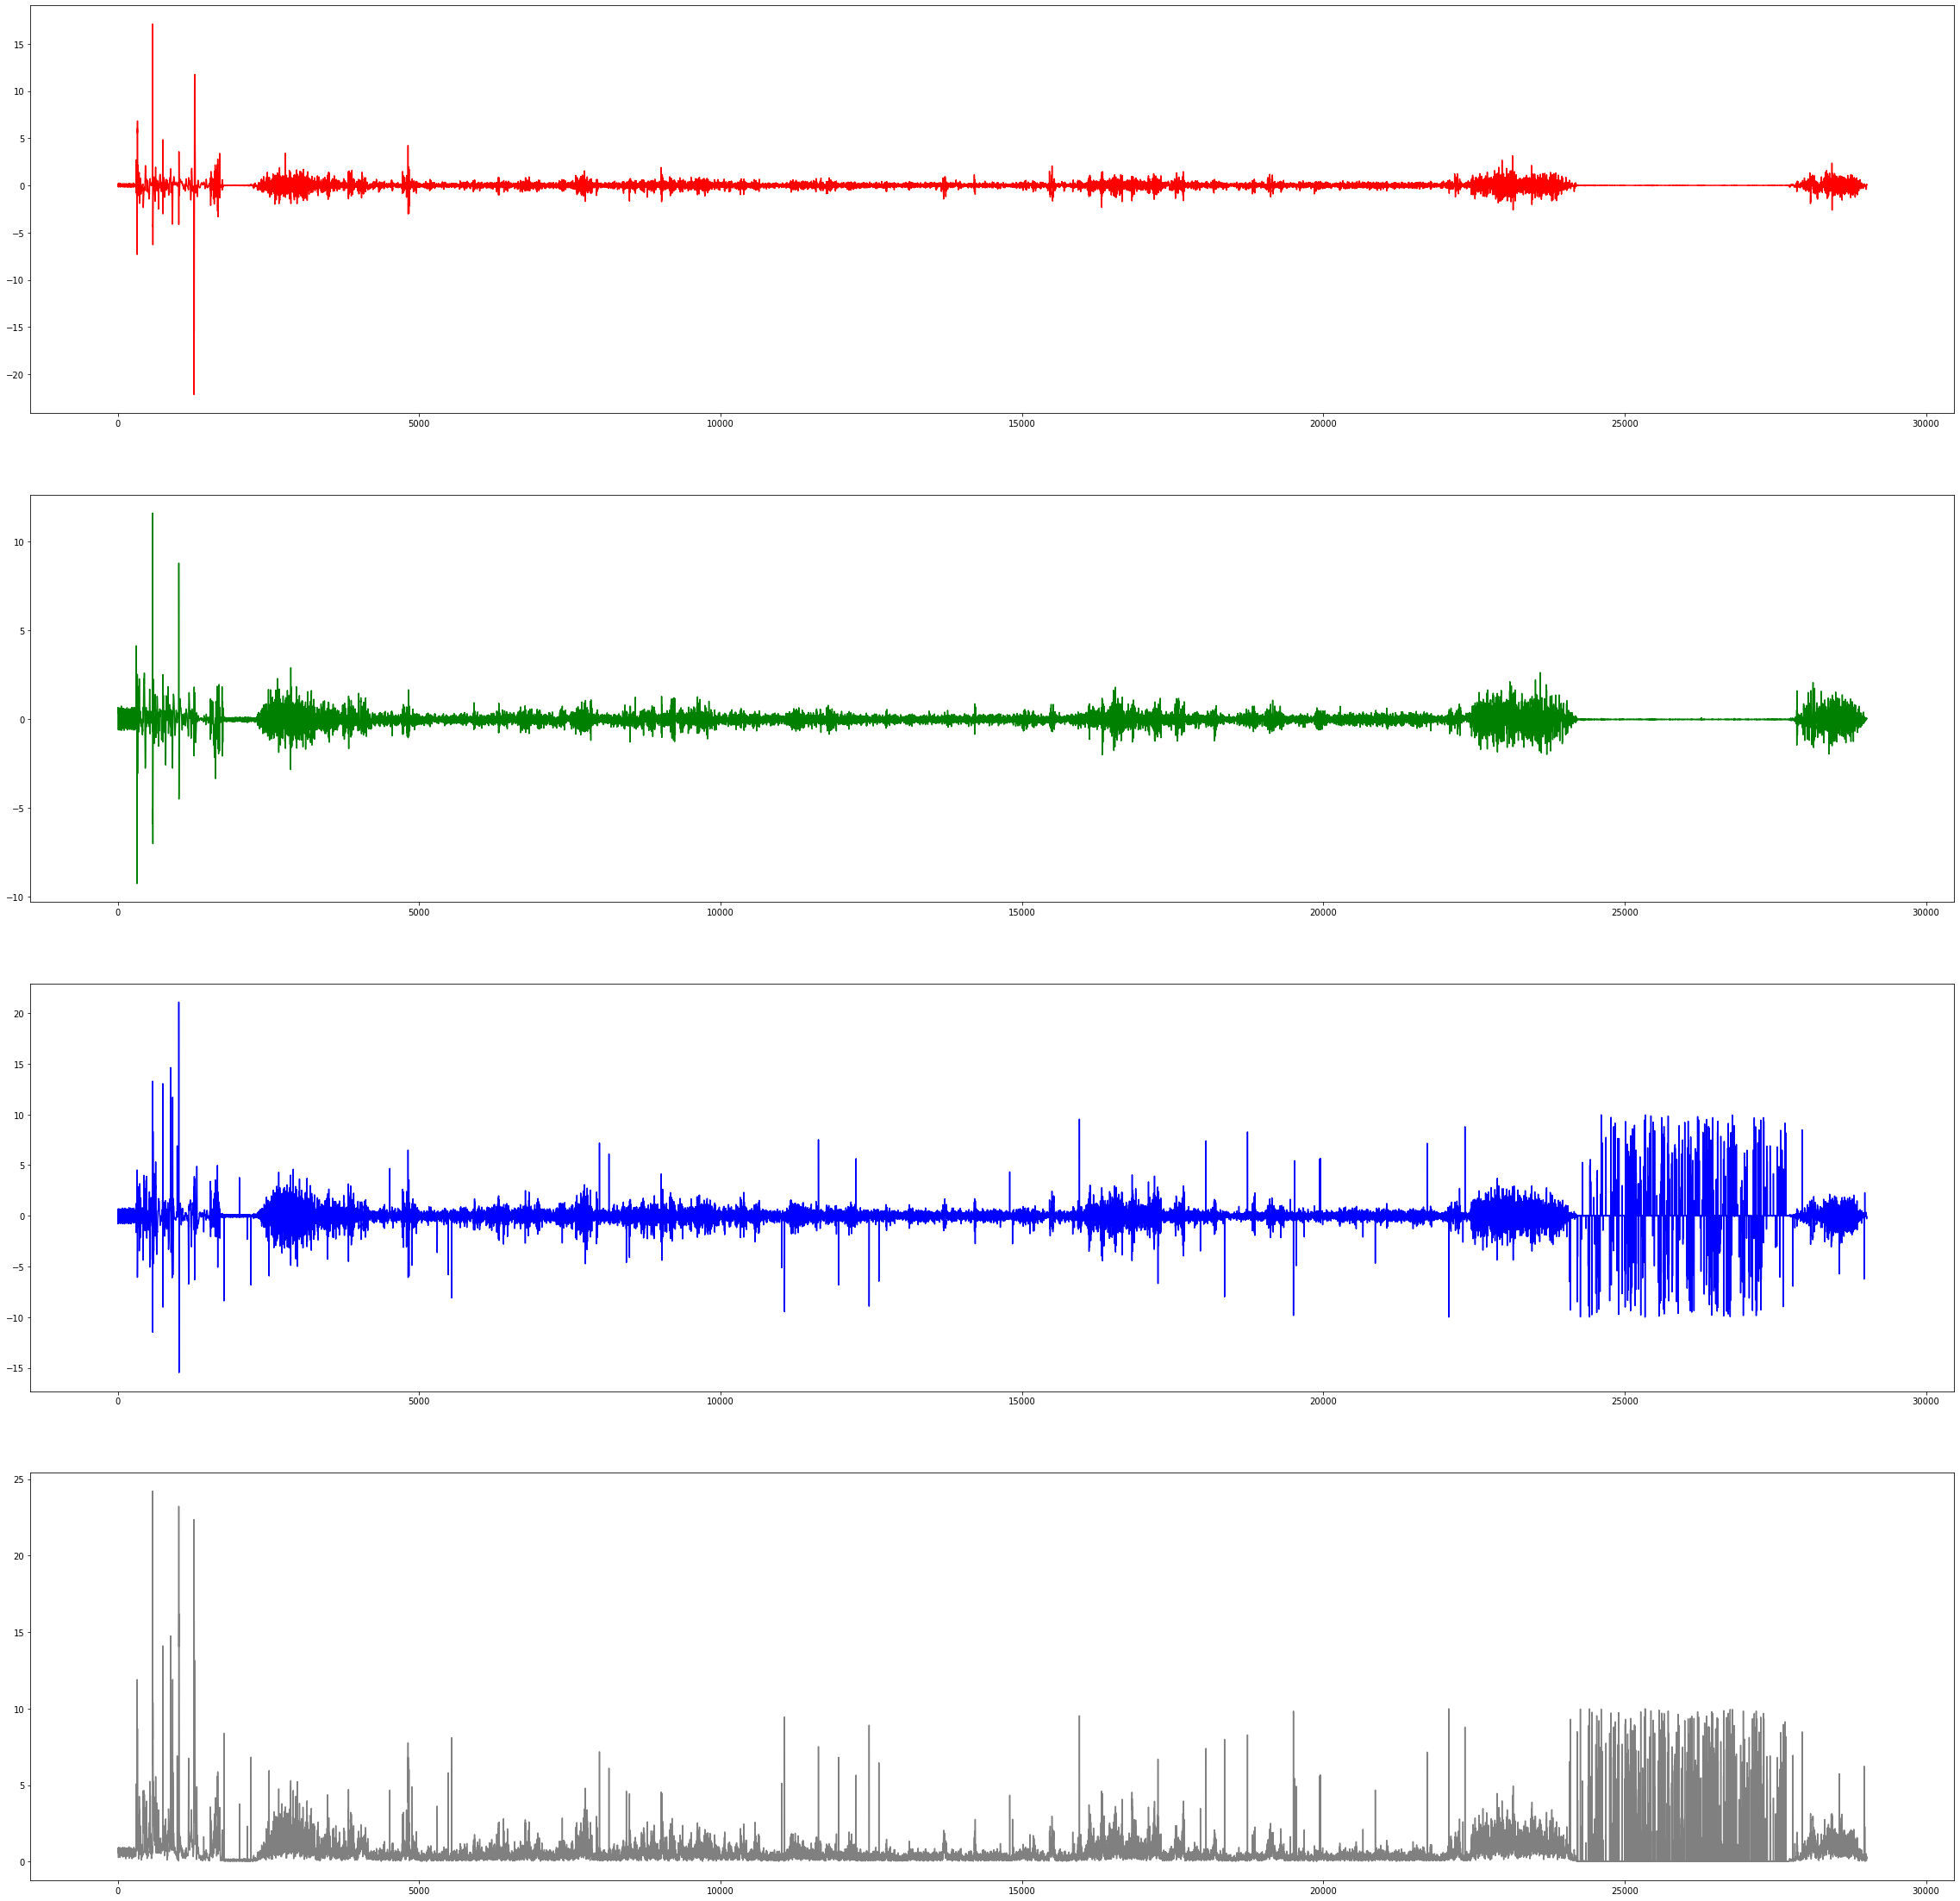

In [6]:
plt.clf()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(40,40))
ax1.plot(ts, xs, color='red')
ax2.plot(ts, ys, color='green')
ax3.plot(ts, zs, color='blue')
ax4.plot(ts, mag, color='grey')
plt.show()

In [7]:
kernel_size = 128

In [8]:
fft_real = []
fft_imag = []
fft_max = []
for i in range(len(mag) - kernel_size):
    fft = np.fft.fft(mag[i:i+kernel_size])[1:]
    fft_real += [max(fft).real]
    fft_imag += [max(fft).imag]
    fft_max += [np.argmax(fft)+1]
    #print("Global maximum @ {} (max {})".format(np.argmax(fft)+1, max(fft)))

<Figure size 432x288 with 0 Axes>

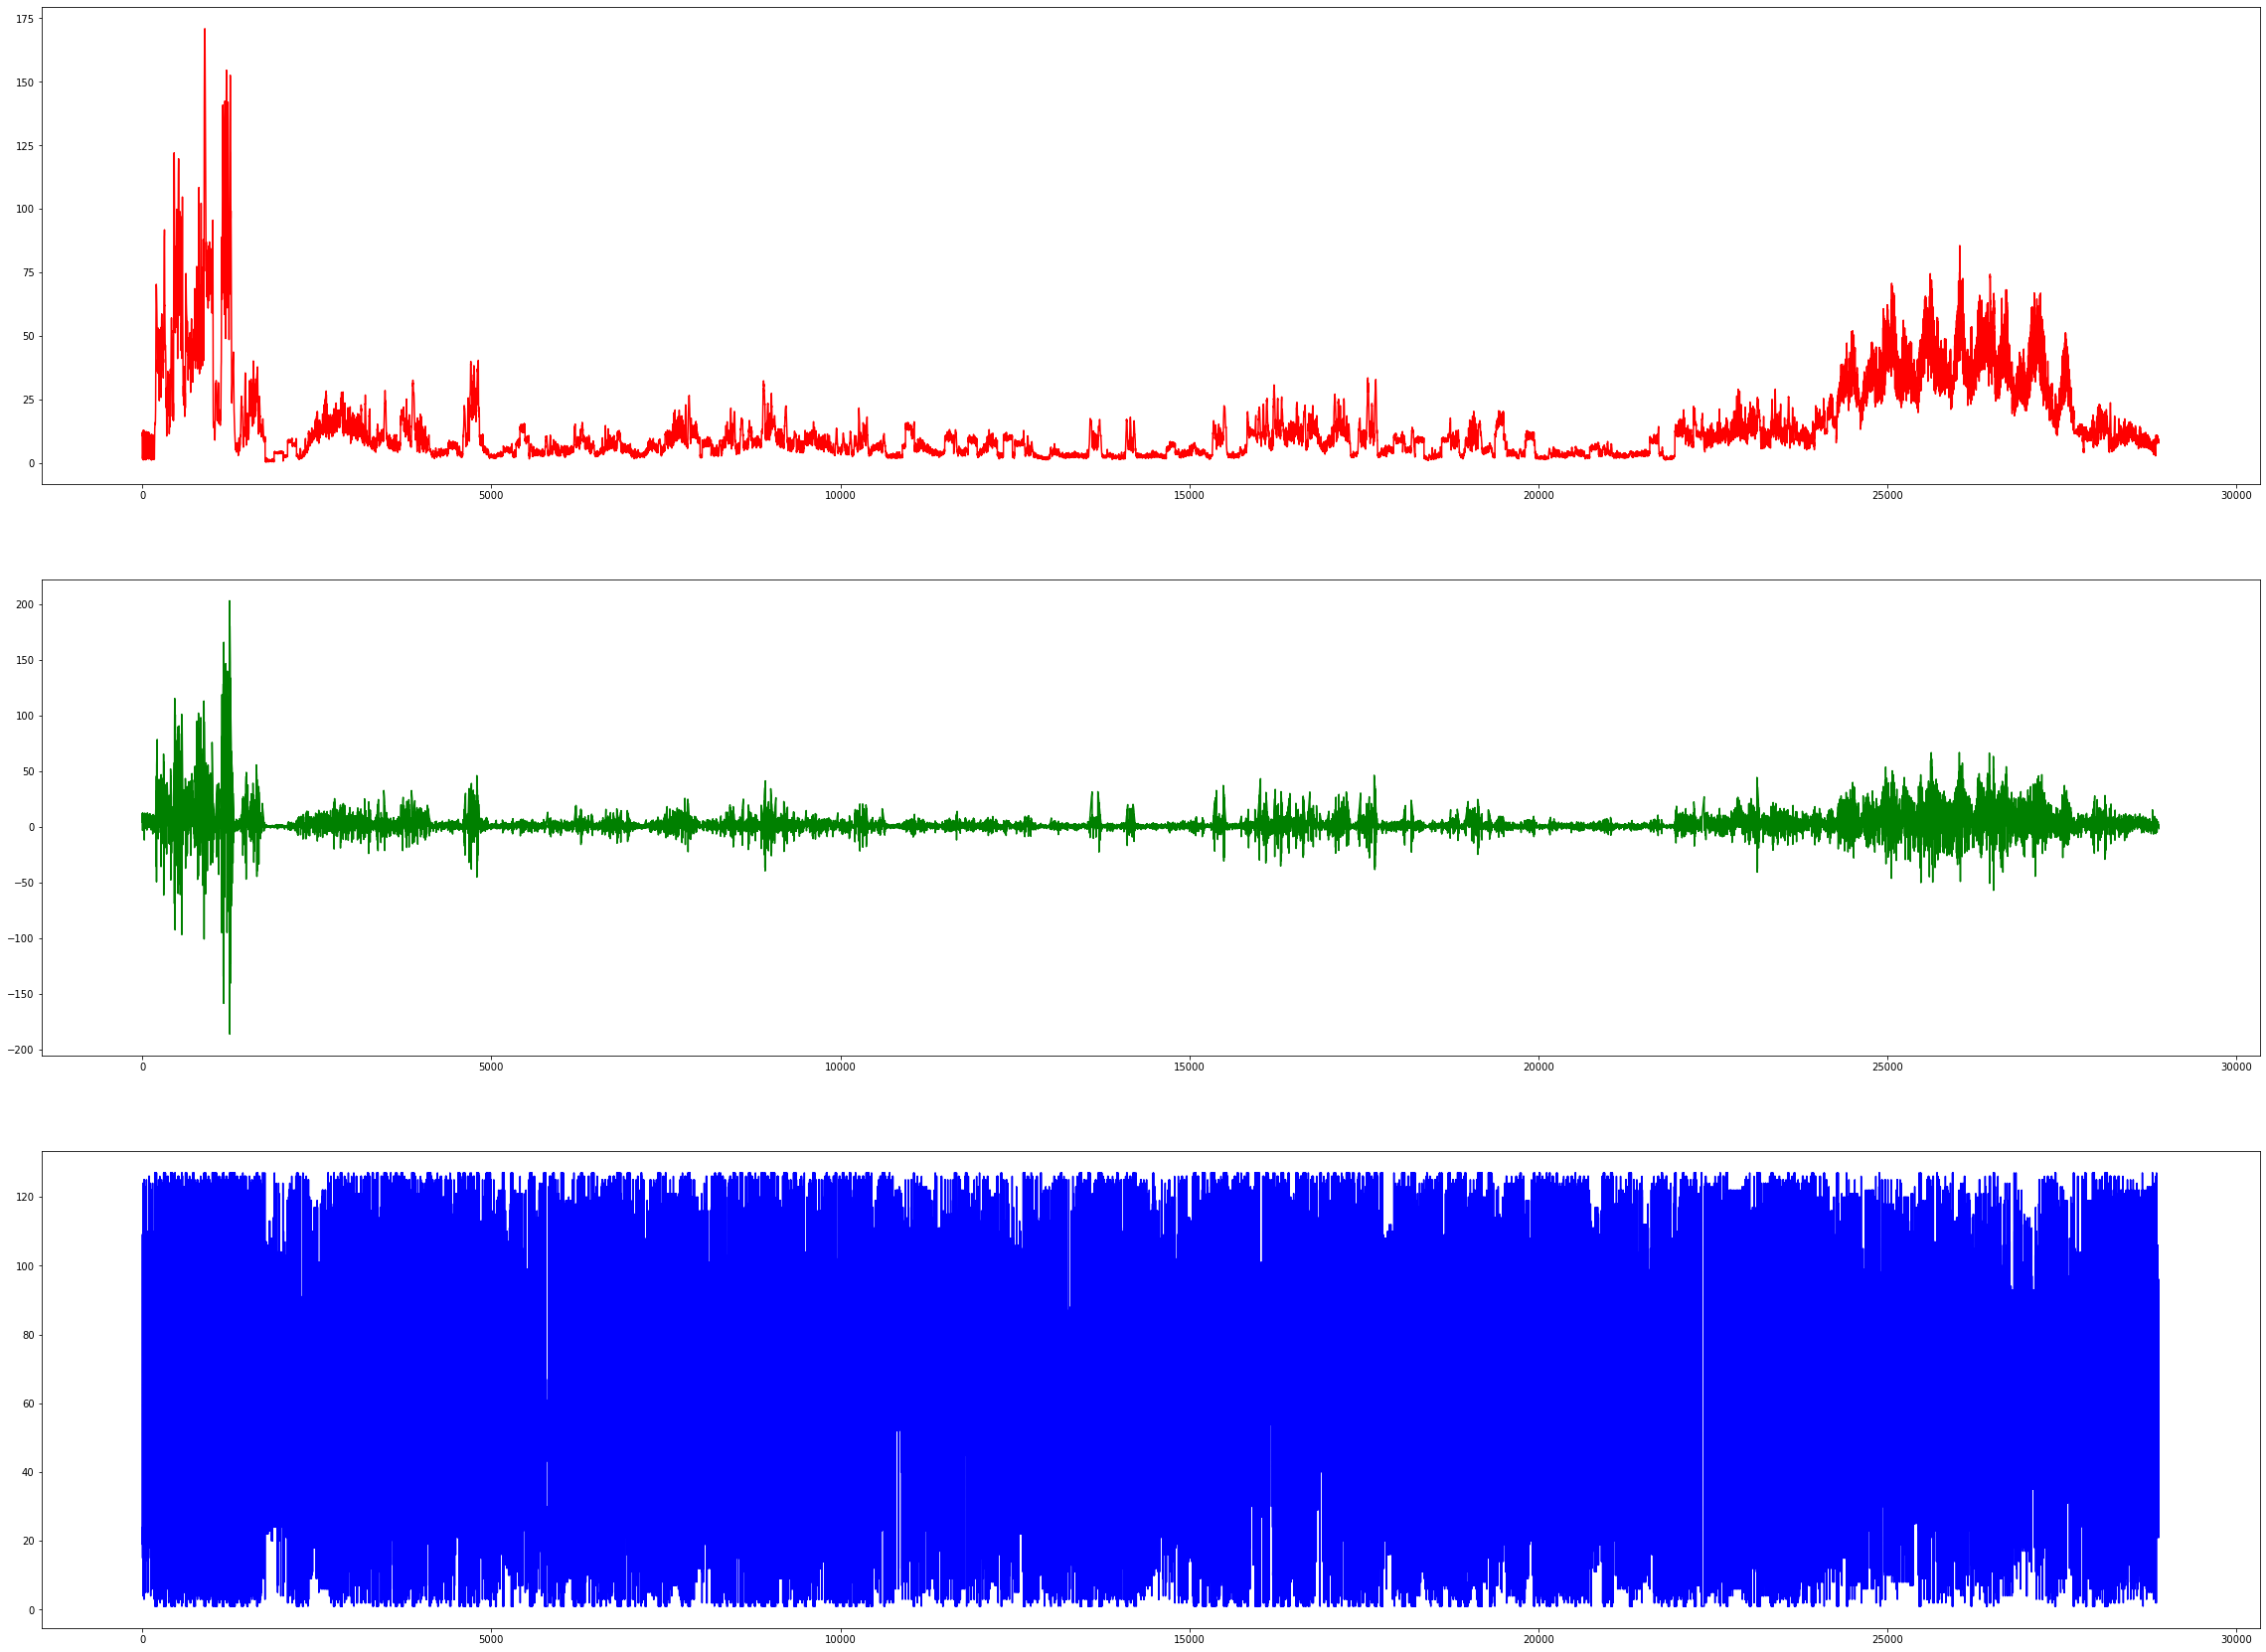

In [9]:
ts = np.arange(0, len(fft_max), 1)
plt.clf()
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(40,30))
ax1.plot(ts, fft_real, color='red')
ax2.plot(ts, fft_imag, color='green')
ax3.plot(ts, fft_max, color='blue')
plt.show()

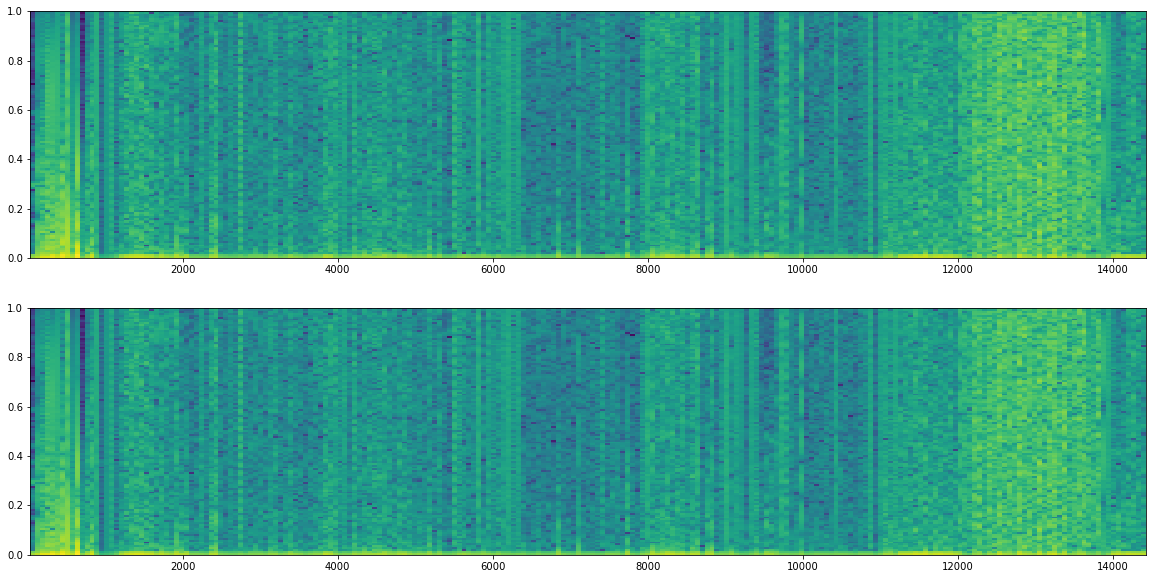

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,10))
Pxx, freqs, bins, im = ax1.specgram(mag, Fs = 2, mode="psd")
Pxx, freqs, bins, im = ax2.specgram(mag, Fs = 2, mode="magnitude")
# The `specgram` method returns 4 objects. They are:
# - Pxx: the periodogram
# - freqs: the frequency vector
# - bins: the centers of the time bins
# - im: the matplotlib.image.AxesImage instance representing the data in the plot

Text(0.5, 1.0, 'Spectrogram on Z-axis')

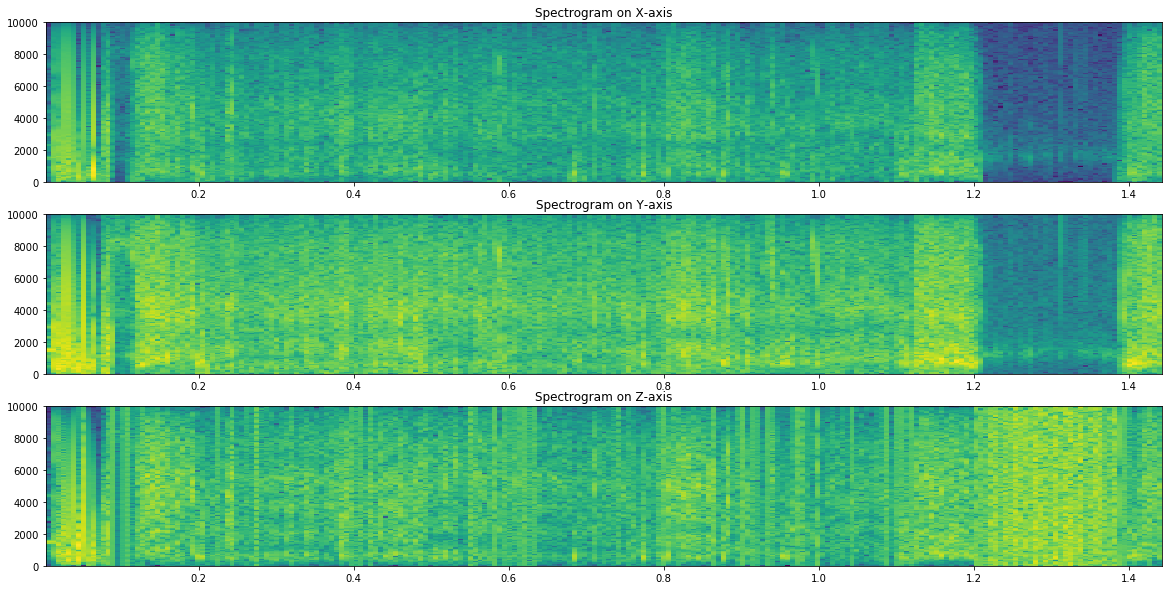

In [11]:
Fs = 1./0.00005 # Sampling frequency

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(20,10))
Pxx, freqs, bins, im = ax1.specgram(xs, Fs = Fs)
ax1.set_title('Spectrogram on X-axis')
Pxx, freqs, bins, im = ax2.specgram(ys, Fs = Fs)
ax2.set_title('Spectrogram on Y-axis')
Pxx, freqs, bins, im = ax3.specgram(zs, Fs = Fs)
ax3.set_title('Spectrogram on Z-axis')
# The `specgram` method returns 4 objects. They are:
# - Pxx: the periodogram
# - freqs: the frequency vector
# - bins: the centers of the time bins
# - im: the matplotlib.image.AxesImage instance representing the data in the plot

<Figure size 432x288 with 0 Axes>

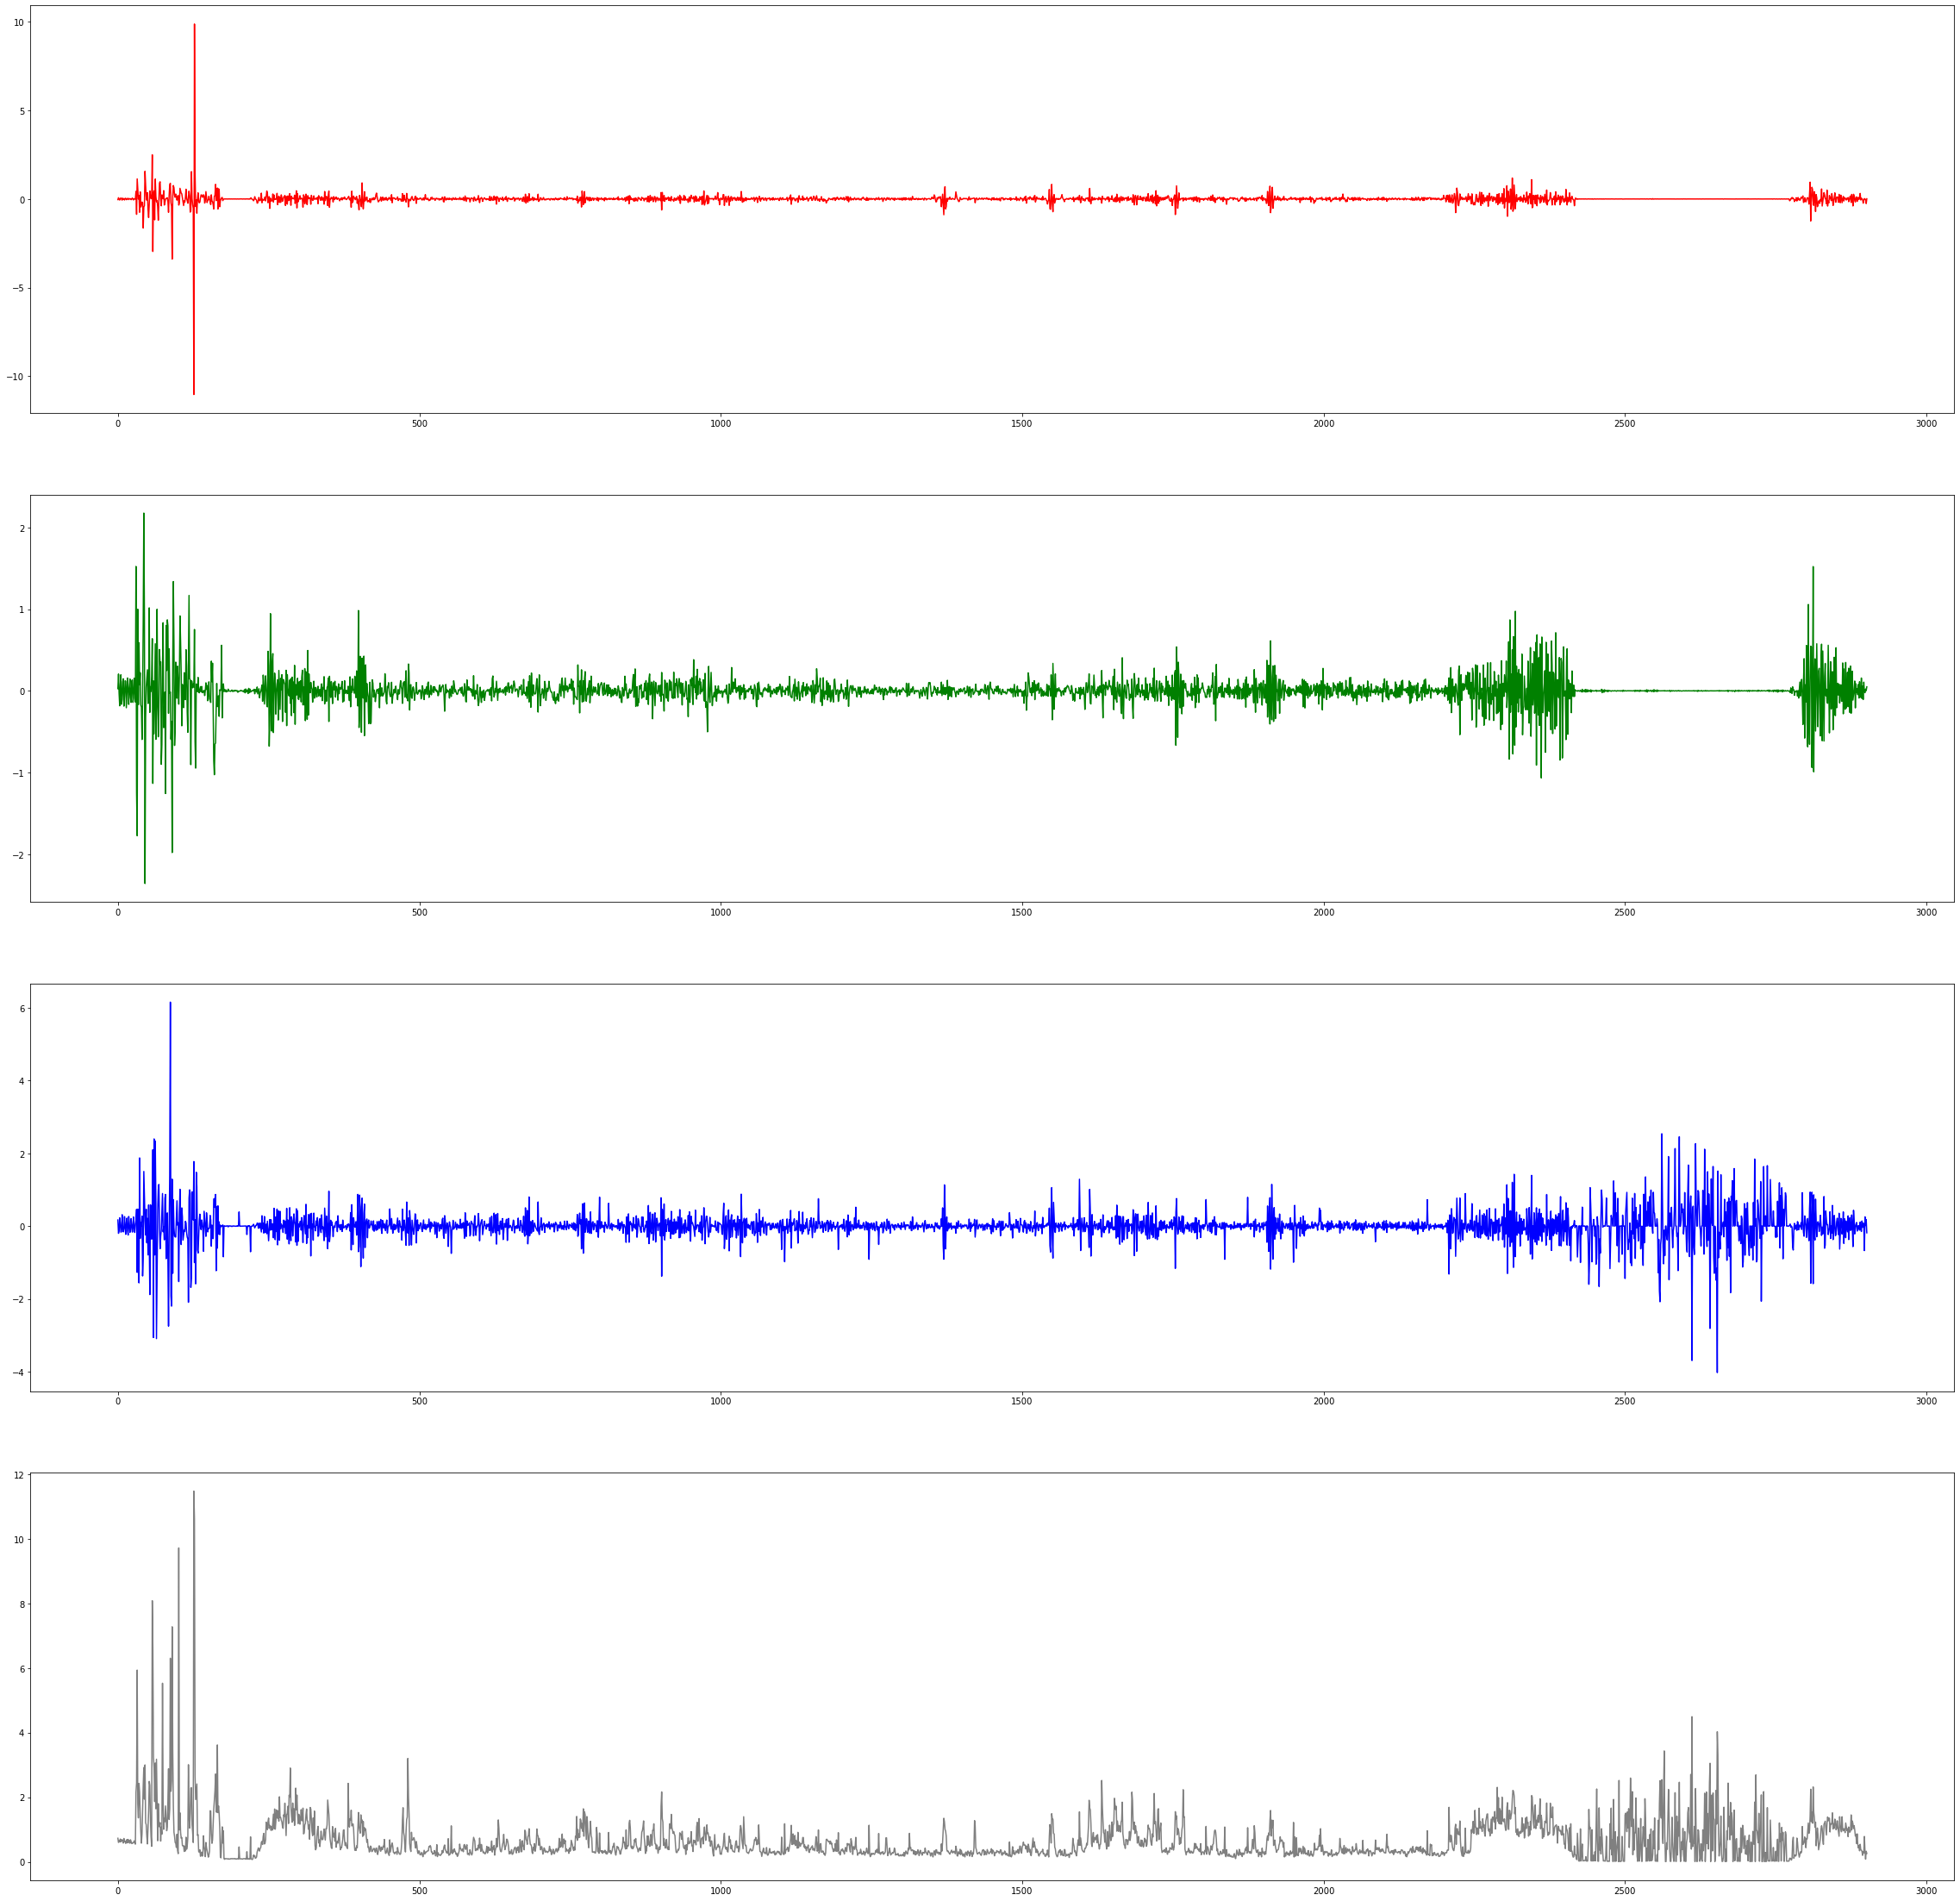

In [12]:
window = 10

plt.clf()
end_len = math.ceil(len(mag)/window)
ts = np.arange(0, end_len, 1)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(40,40))
ax1.plot(ts, [np.mean( xs[i*window:(i+1)*window]) for i in range(end_len)], color='red')
ax2.plot(ts, [np.mean( ys[i*window:(i+1)*window]) for i in range(end_len)], color='green')
ax3.plot(ts, [np.mean( zs[i*window:(i+1)*window]) for i in range(end_len)], color='blue')
ax4.plot(ts, [np.mean(mag[i*window:(i+1)*window]) for i in range(end_len)], color='grey')
plt.show()